In [30]:
import whisper
# import ffmpeg
import matplotlib.pyplot as plt
import os
import pandas as pd

model = whisper.load_model("large")

 38%|█████████████▉                       | 1.08G/2.88G [00:17<00:29, 66.1MiB/s]


OSError: [Errno 28] No space left on device

In [5]:
def ld_audio_transcribe_and_spectrogram(file_path, model=model):
    """
    Load audio file, transcribe it, and generate a spectrogram.
    """
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File {file_path} does not exist.")
    
    # Transcribe the audio file
    result = model.transcribe(file_path)
    
    # Generate log-mel spectrogram
    lg_ml = whisper.log_mel_spectrogram(file_path)
    
    return result, lg_ml

# result = model.transcribe("Helen--Bes.m4a")

# print(result["text"])

# lg_ml = whisper.log_mel_spectrogram("Helen--Bes.m4a")
# plt.imshow(lg_ml.T, aspect='auto', origin='lower')

In [4]:
result = model.transcribe("Ethan_bes.m4a")
print(result["text"])

 Hello, my name is Baz.


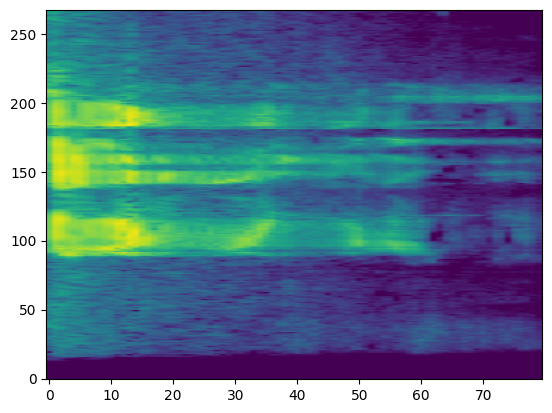

In [5]:

lg_ml = whisper.log_mel_spectrogram("Ethan_bes.m4a")
plt.imshow(lg_ml.T, aspect='auto', origin='lower')

In [13]:

def extract_features(path):
    filename = os.path.basename(path)
    name_part = filename.split('_')[0].split('--')[0]
    if 'pixel' in filename.lower():
        device = 'pixel'
    elif 'iphone' in filename.lower():
        device = 'iphone'
    else:
        device = 'unknown'
    return pd.Series([name_part, device])

# List of file paths in 'src' directory ending with .m4a
src_dir = "/workspace/mlx-whisper/src"
file_paths = [os.path.join(src_dir, f) for f in os.listdir(src_dir) if f.endswith(".m4a")]

df_files = pd.DataFrame({'file_path': file_paths})
df_files[['name', 'device']] = df_files['file_path'].apply(extract_features)
print(df_files)

                                          file_path   name  device
0   /workspace/mlx-whisper/src/Clem--Bes_iphone.m4a   Clem  iphone
1     /workspace/mlx-whisper/src/Clem_bes_pixel.m4a   Clem   pixel
2  /workspace/mlx-whisper/src/Ethan--Bes_iphone.m4a  Ethan  iphone
3    /workspace/mlx-whisper/src/Helen_bes-pixel.m4a  Helen   pixel
4  /workspace/mlx-whisper/src/Helen--Bes_iphone.m4a  Helen  iphone
5    /workspace/mlx-whisper/src/Ethan_bes_pixel.m4a  Ethan   pixel


/tmp/ipykernel_24030/999444366.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.93])


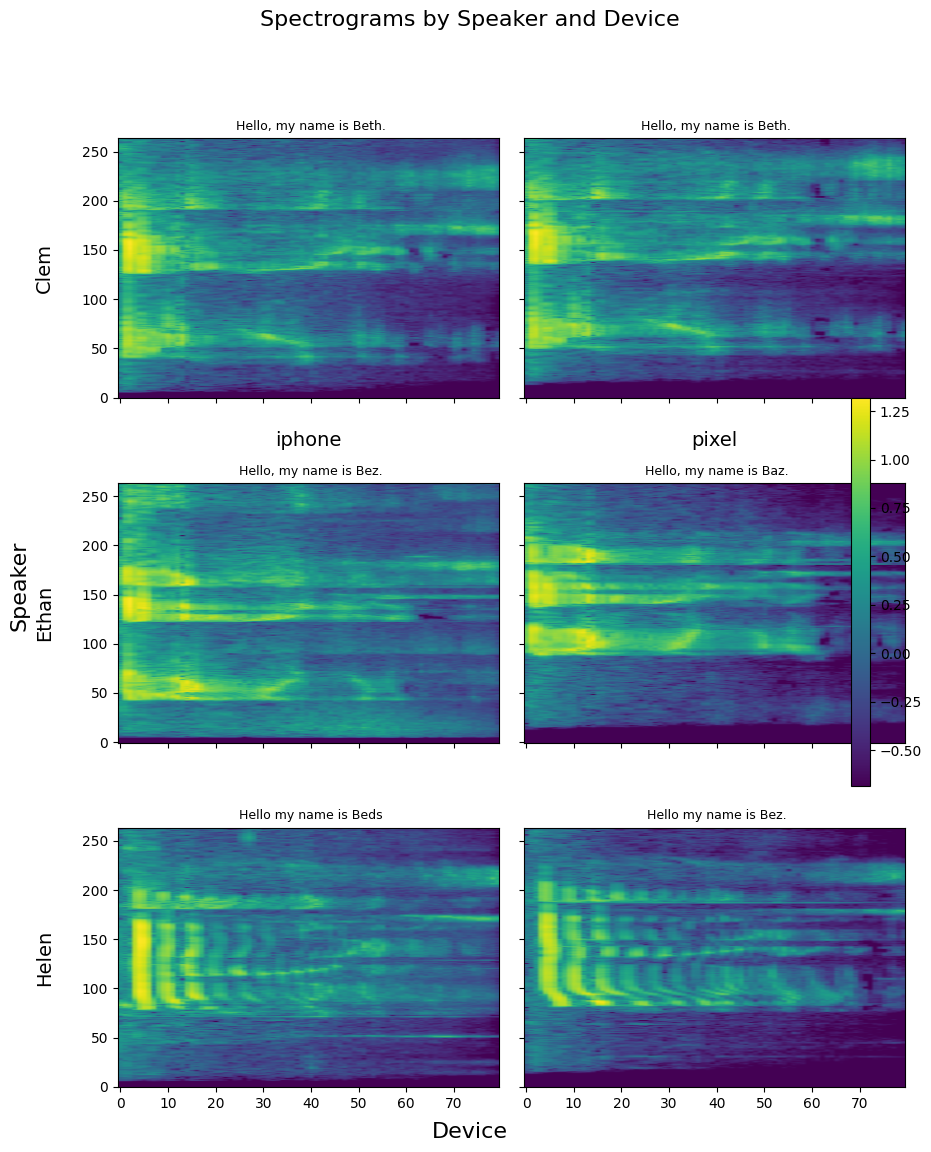

In [26]:
n_rows = len(names)
n_cols = len(devices)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), sharex=True, sharey=True)

im = None  # for colorbar

for i, name in enumerate(names):
    for j, device in enumerate(devices):
        ax = axes[i, j]
        match = df_files[(df_files['name'] == name) & (df_files['device'] == device)]
        if not match.empty:
            file_path = match.iloc[0]['file_path']
            try:
                result, lg_ml = ld_audio_transcribe_and_spectrogram(file_path)
                im = ax.imshow(lg_ml.T, aspect='auto', origin='lower')
                ax.set_title(result["text"], fontsize=9, wrap=True)
            except Exception as e:
                ax.set_title("Error")
                ax.axis('off')
        else:
            ax.set_title("No file")
            ax.axis('off')

# Set column labels (devices)
for j, device in enumerate(devices):
    axes[0, j].set_xlabel(device, fontsize=14, labelpad=20)

# Set row labels (names)
for i, name in enumerate(names):
    axes[i, 0].set_ylabel(name, fontsize=14, labelpad=20)

fig.text(0.5, 0.04, 'Device', ha='center', fontsize=16)
fig.text(0.04, 0.5, 'Speaker', va='center', rotation='vertical', fontsize=16)
fig.suptitle("Spectrograms by Speaker and Device", fontsize=16)

if im is not None:
    cbar = fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.025, pad=0.04)

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.93])
plt.show()


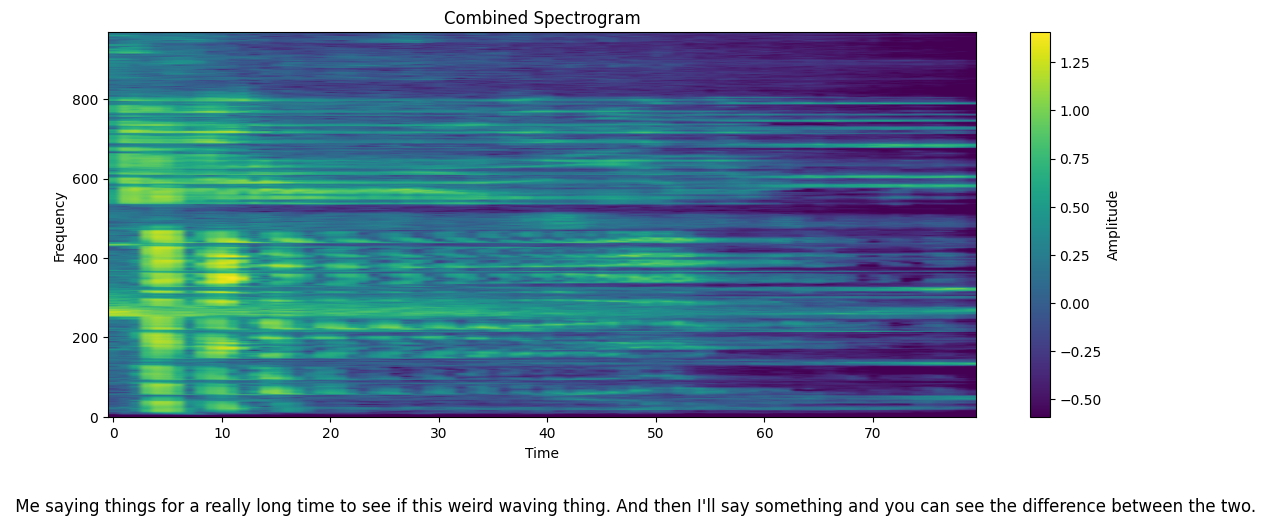

In [21]:
transcription, spectrogram_combined = ld_audio_transcribe_and_spectrogram("/workspace/mlx-whisper/src/combined.m4a")
plt.figure(figsize=(14, 5))
plt.imshow(spectrogram_combined.T, aspect='auto', origin='lower')
plt.title("Combined Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(label='Amplitude')
plt.figtext(0.5, -0.08, transcription["text"], wrap=True, ha='center', fontsize=12)
plt.show()

In [18]:
transcription

{'text': " Me saying things for a really long time to see if this weird waving thing. And then I'll say something and you can see the difference between the two.",
 'segments': [{'id': 0,
   'seek': 0,
   'start': 0.0,
   'end': 5.0,
   'text': ' Me saying things for a really long time to see if this weird waving thing.',
   'tokens': [50364,
    1923,
    1566,
    721,
    337,
    257,
    534,
    938,
    565,
    281,
    536,
    498,
    341,
    3657,
    35347,
    551,
    13,
    50614],
   'temperature': 0.0,
   'avg_logprob': -0.2860801026627824,
   'compression_ratio': 1.3157894736842106,
   'no_speech_prob': 0.008323334157466888},
  {'id': 1,
   'seek': 0,
   'start': 5.0,
   'end': 9.0,
   'text': " And then I'll say something and you can see the difference between the two.",
   'tokens': [50614,
    400,
    550,
    286,
    603,
    584,
    746,
    293,
    291,
    393,
    536,
    264,
    2649,
    1296,
    264,
    732,
    13,
    50814],
   'temperature': 

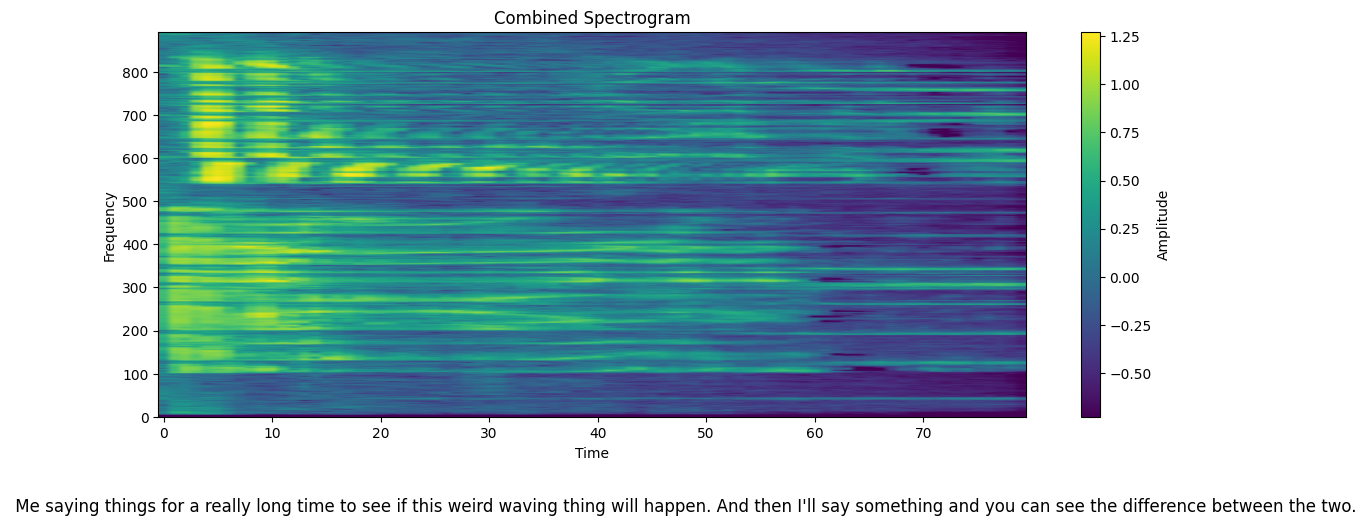

In [20]:
transcription, spectrogram_combined = ld_audio_transcribe_and_spectrogram("/workspace/mlx-whisper/src/newcombined.m4a")
plt.figure(figsize=(14, 5))
plt.imshow(spectrogram_combined.T, aspect='auto', origin='lower')
plt.title("Combined Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(label='Amplitude')
plt.figtext(0.5, -0.08, transcription["text"], wrap=True, ha='center', fontsize=12)
plt.show()

In [24]:
spectrogram_combined.shape

torch.Size([80, 970])

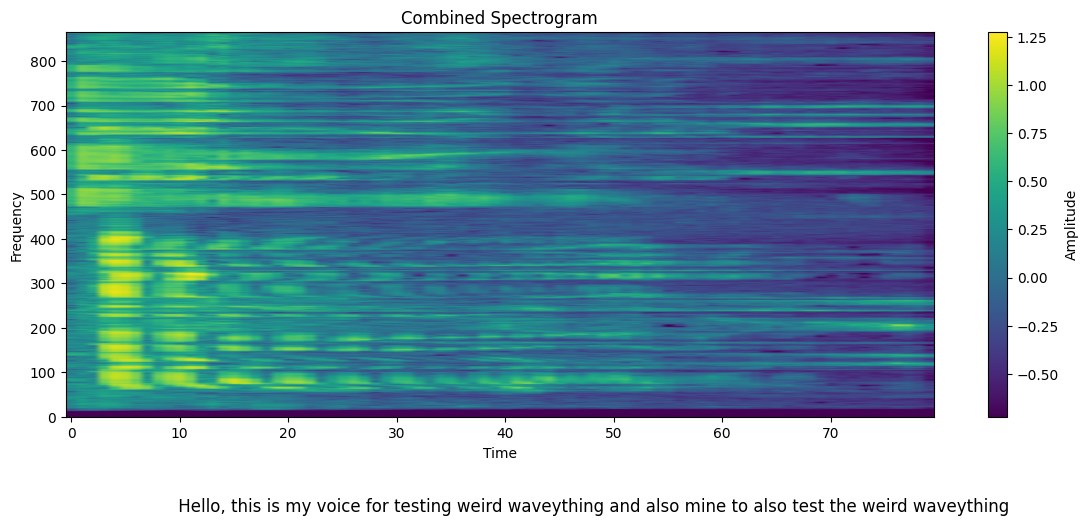

In [25]:
transcription, spectrogram_combined = ld_audio_transcribe_and_spectrogram("/workspace/mlx-whisper/src/combined3.m4a")
plt.figure(figsize=(14, 5))
plt.imshow(spectrogram_combined.T, aspect='auto', origin='lower')
plt.title("Combined Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(label='Amplitude')
plt.figtext(0.5, -0.08, transcription["text"], wrap=True, ha='center', fontsize=12)
plt.show()

/workspace/mlx-whisper/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3621 (\N{THAI CHARACTER LO LING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/workspace/mlx-whisper/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12316 (\N{WAVE DASH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


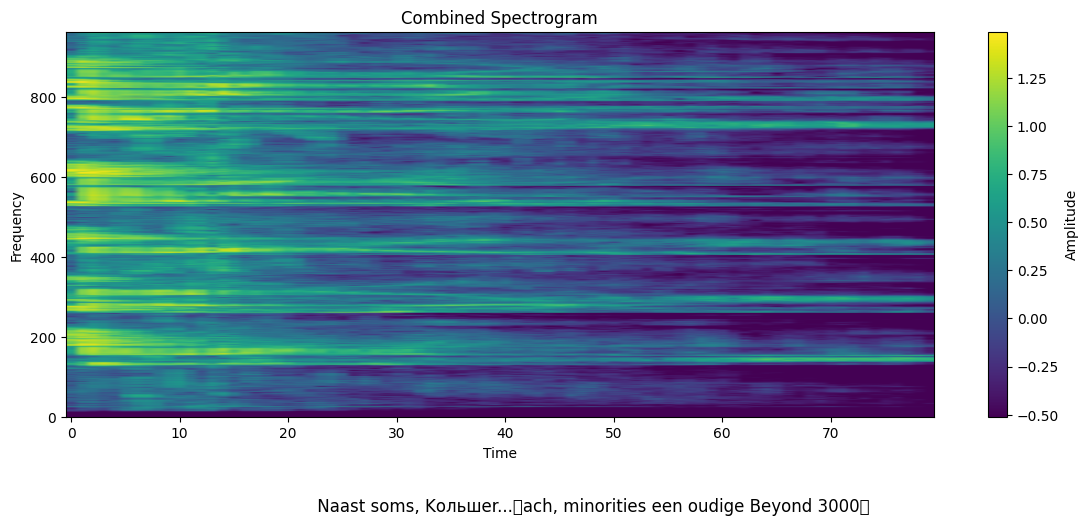

In [32]:
transcription, spectrogram_combined = ld_audio_transcribe_and_spectrogram("/workspace/mlx-whisper/src/SomeWelsh.m4a")
plt.figure(figsize=(14, 5))
plt.imshow(spectrogram_combined.T, aspect='auto', origin='lower')
plt.title("Combined Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(label='Amplitude')
plt.figtext(0.5, -0.08, transcription["text"], wrap=True, ha='center', fontsize=12)
plt.show()

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


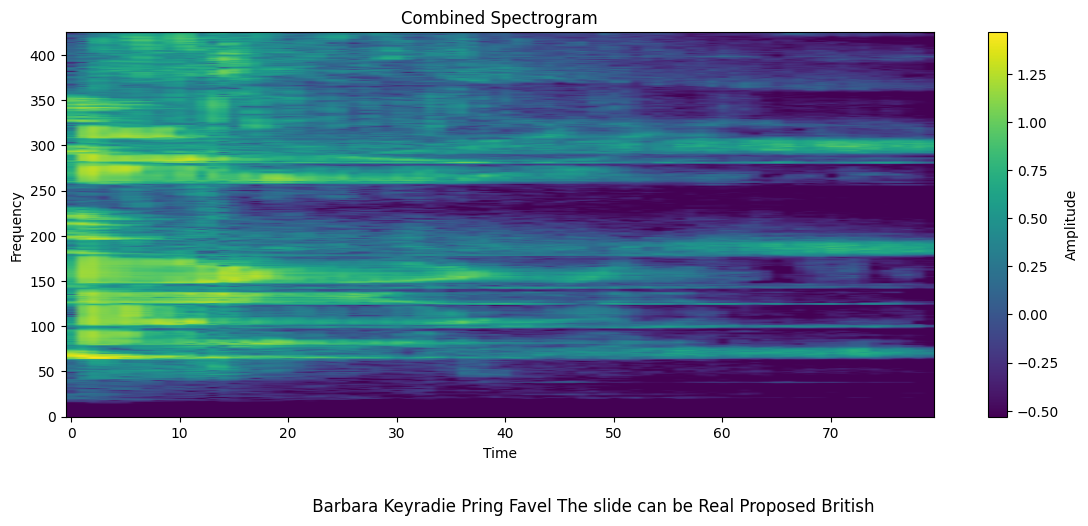

In [31]:
transcription, spectrogram_combined = ld_audio_transcribe_and_spectrogram("/workspace/mlx-whisper/src/MoreWelsh.m4a")
plt.figure(figsize=(14, 5))
plt.imshow(spectrogram_combined.T, aspect='auto', origin='lower')
plt.title("Combined Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(label='Amplitude')
plt.figtext(0.5, -0.08, transcription["text"], wrap=True, ha='center', fontsize=12)
plt.show()